In [1]:
using DifferentialEquations
using Plots

In [2]:
function predation(u0, p, t)
    x, y = u0 # Initial population sizes
    dx = p.r*x - p.α*x*x - p.β*x*y 
    dy = p.γ*x*y - p.δ*y 
    return [dx, dy]
end

predation (generic function with 1 method)

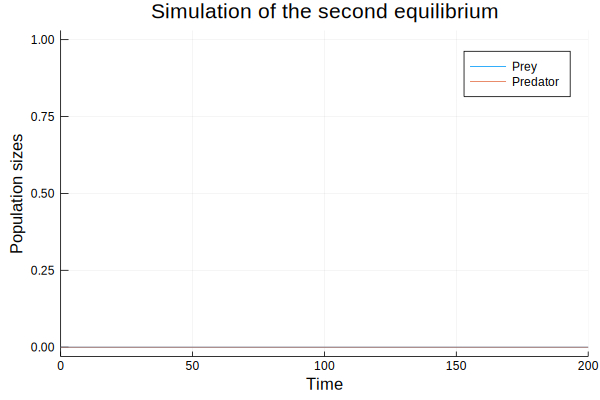

In [31]:
# Initial population sizes corresponding to the first equilibrium
u0_eq1 = [0.0, 0.0]

# t0 - t end
t_eq1 = (0., 200.)

# Parameters
p_eq1 = (r=1.2, α=0.9, β=1.1, γ=0.8, δ=1.0)

# Problem definition
prob_eq1 = ODEProblem(predation, u0_eq1, t_eq1, p_eq1)

# Problem resolution
solution_eq1 = solve(prob_eq1)

# Plot
plot(solution_eq1, label=["Prey" "Predator"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the second equilibrium")

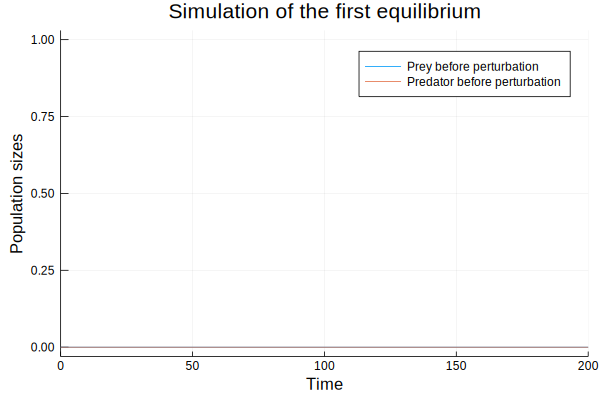

In [37]:
##FIRST EQ

# Initial population sizes corresponding to the first equilibrium
u0_eq1 = [0.0, 0.0]

# t0 - t end
t_eq1 = (0., 200.)

# Parameters
p_eq1 = (r=0.9, α=1.1, β=1.1, γ=1.2, δ=0.8)

# Problem definition
prob_eq1 = ODEProblem(predation, u0_eq1, t_eq1, p_eq1)

# Problem resolution
solution_eq1 = solve(prob_eq1)

# Plot the solution before perturbation
plot(solution_eq1, label=["Prey before perturbation" "Predator before perturbation"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the first equilibrium")




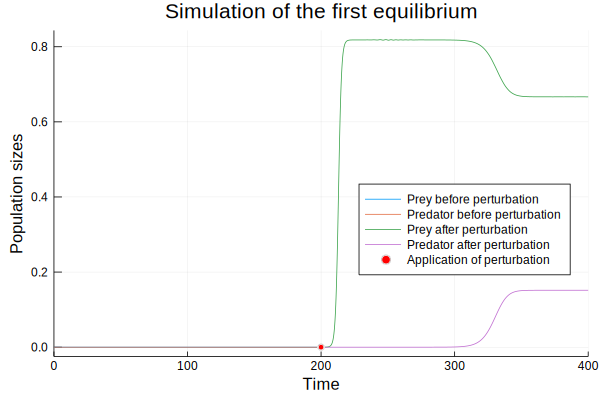

In [36]:
##FIRST EQ PERTURBATION

# t0 - t end with perturbation
pert_t_eq1 = (200., 400.)

#Adding a small perturbation to the intial population sizes that correspond to the first equilibrium
pert_u0_eq1 = u0_eq1 .+ rand(2).*1e-5

# Problem definition with perturbation
pert_prob_eq1 = ODEProblem(predation, pert_u0_eq1, pert_t_eq1, p_eq1)

# Problem resolution with perturbation
pert_solution_eq1 = solve(pert_prob_eq1)

# Plot the solutionafter perturbation
plot!(pert_solution_eq1, xlab="Time", ylab="Population sizes", label=["Prey after perturbation" "Predator after perturbation"],legend=:right, xlim=(0,400))
scatter!([200], [pert_u0_eq1[1]], c=:red, lab="Application of perturbation")


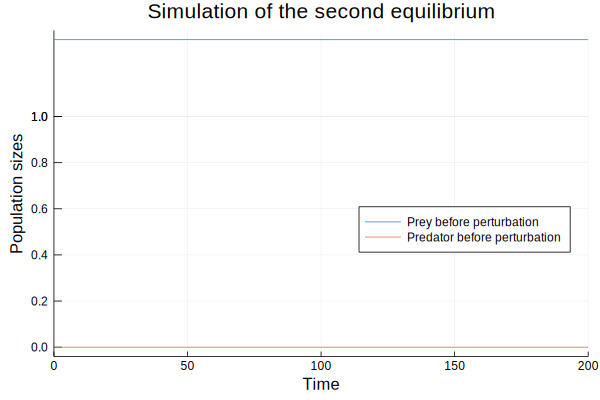

In [30]:
## SECOND EQ

# Parameters
p_eq2 = (r=1.2, α=0.9, β=1.1, γ=0.8, δ=1.0)

# Initial population sizes corresponding to the second equilibrium
u0_eq2 = [p_eq2.r/p_eq2.α, 0.0]

# t0 - t end
t_eq2 = (0., 200.)

# Problem definition
prob_eq2 = ODEProblem(predation, u0_eq2, t_eq2, p_eq2)

# Problem resolution
solution_eq2 = solve(prob_eq2)

# Plot the solution before perturbation
plot(solution_eq2, label=["Prey before perturbation" "Predator before perturbation"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the second equilibrium")




In [13]:
"""
This function is generating a multitudes of combinations of parameters and is returning a combination that suits either a stable or an unstable equilibrium.

It takes in argument:
stability: either stable or unstable equilibrium

It returns:
A combination of parameters corresponding the the desired situation (stable or unstable)
"""

function parameters_eq2(stability)
    p_eq2_stable = []
    p_eq2_unstable = []
    # Grid for the generation of parameters
    possible_values = 0.9:0.05:1.1
    for r in possible_values, α in possible_values
        for β in possible_values
            for γ in possible_values, δ in possible_values
                p = (r=r, α=α, β=β, γ=γ, δ=δ)
                if p.r/p.α < p.δ/p.γ
                    push!(p_eq2_stable, p)
                end
                if p.r/p.α > p.δ/p.γ
                    push!(p_eq2_unstable, p)
                end
            end
        end
    end
    if stability == "stable"
        return(rand(p_eq2_stable))
    end
    if stability == "unstable"
        return(rand(p_eq2_unstable))
    end
end

parameters_eq2 (generic function with 1 method)

In [91]:
p_eq2_stable = parameters_eq2("stable")

(r = 0.9, α = 1.1, β = 0.9, γ = 0.9, δ = 1.05)

In [92]:
p_eq2_stable = parameters_eq2("unstable")

(r = 1.05, α = 0.9, β = 1.1, γ = 0.9, δ = 0.95)

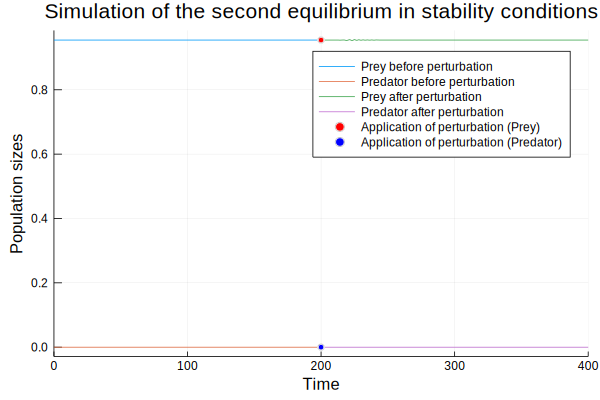

In [15]:
##SECOND EQ PERTURBATION STABLE

##Simulation for a stable equilibrium before perturbation

# Parameters for a stable equilibrium
p_eq2_stable = parameters_eq2("stable")

# Initial population sizes corresponding to the second equilibrium
u0_eq2_stable = [p_eq2_stable.r/p_eq2_stable.α, 0.0]

# t0 - t end
t_eq2_stable = (0., 200.)

# Problem definition
prob_eq2_stable = ODEProblem(predation, u0_eq2_stable, t_eq2_stable, p_eq2_stable)

# Problem resolution
solution_eq2_stable = solve(prob_eq2_stable)

# Plot the solution before perturbation
plot(solution_eq2_stable, label=["Prey before perturbation" "Predator before perturbation"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the second equilibrium in stability conditions")

#Simulation for the stable equilibrium after perturbation
# t0 - t end with perturbation
pert_t_eq2_stable = (200., 400.)

#Adding a small perturbation to the intial population sizes that correspond to the second equilibrium
pert_u0_eq2_stable = u0_eq2_stable .+ rand(2).*1e-5

# Problem definition with perturbation
pert_prob_eq2_stable = ODEProblem(predation, pert_u0_eq2_stable, pert_t_eq2_stable, p_eq2_stable)

# Problem resolution with perturbation
pert_solution_eq2_stable = solve(pert_prob_eq2_stable)

# Plot the solutionafter perturbation
plot!(pert_solution_eq2_stable, xlab="Time", ylab="Population sizes", label=["Prey after perturbation" "Predator after perturbation"], xlim=(0,400))
scatter!([200], [pert_u0_eq2_stable[1]], c=:red, lab="Application of perturbation (Prey)")
scatter!([200], [pert_u0_eq2_stable[2]], c=:blue, lab="Application of perturbation (Predator)", legend =:best)



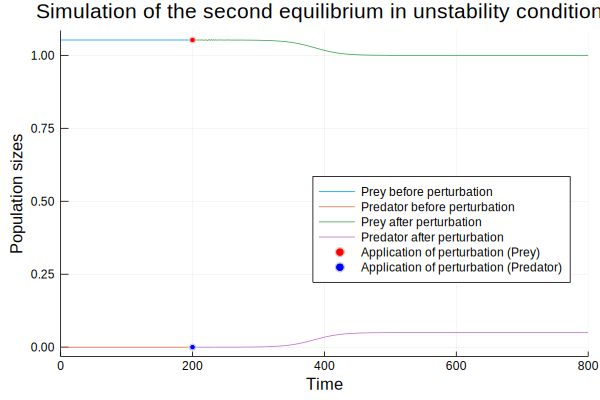

In [160]:
##SECOND EQ PERTURBATION UNSTABLE

##Simulation for a unstable equilibrium before perturbation

# Parameters for a unstable equilibrium
p_eq2_unstable = parameters_eq2("unstable")

# Initial population sizes corresponding to the second equilibrium
u0_eq2_unstable = [p_eq2_unstable.r/p_eq2_unstable.α, 0.0]

# t0 - t end
t_eq2_unstable = (0., 200.)

# Problem definition
prob_eq2_unstable = ODEProblem(predation, u0_eq2_unstable, t_eq2_unstable, p_eq2_unstable)

# Problem resolution
solution_eq2_unstable = solve(prob_eq2_unstable)

# Plot the solution before perturbation
plot(solution_eq2_unstable, label=["Prey before perturbation" "Predator before perturbation"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the second equilibrium in unstability conditions")

#Simulation for the unstable equilibrium after perturbation
# t0 - t end with perturbation
pert_t_eq2_unstable = (200., 800.)

#Adding a small perturbation to the intial population sizes that correspond to the first equilibrium
pert_u0_eq2_unstable = u0_eq2_unstable .+ rand(2).*1e-5

# Problem definition with perturbation
pert_prob_eq2_unstable = ODEProblem(predation, pert_u0_eq2_unstable, pert_t_eq2_unstable, p_eq2_unstable)

# Problem resolution with perturbation
pert_solution_eq2_unstable = solve(pert_prob_eq2_unstable)

# Plot the solutionafter perturbation
plot!(pert_solution_eq2_unstable, xlab="Time", ylab="Population sizes", label=["Prey after perturbation" "Predator after perturbation"], xlim=(0,800))
scatter!([200], [pert_u0_eq2_unstable[1]], c=:red, lab="Application of perturbation (Prey)")
scatter!([200], [pert_u0_eq2_unstable[2]], c=:blue, lab="Application of perturbation (Predator)", legend =:right)



In [141]:
print(p_eq2_unstable)

(r = 1.1, α = 1.1, β = 0.9, γ = 1.1, δ = 1.1)

In [19]:
## SECOND EQ STEAMPLOT

# Steamplot
p2_stable = plot()
for model_run in 1:300
    p_eq2_stable = parameters_eq2("stable")
    prob = ODEProblem(predation, rand(2), t_eq2_stable, p_eq2_stable)
    sol = solve(prob)
    plot!(p2_stable, sol, vars=(1,2), leg=false, c=:teal, alpha=0.2)
end
xaxis!(p2_stable, "Time", (0,1.2))
yaxis!(p2_stable, "Population sizes", (0,1.2))
scatter!([200], [pert_u0_eq2_stable[1]], c=:red, lab="Application of perturbation (Prey)")
scatter!([200], [pert_u0_eq2_stable[2]], c=:blue, lab="Application of perturbation (Predator)", legend =:best)



In [ ]:
# Steamplot / unstable 
pl_un = plot()
for model_run in 1:300
    prob = ODEProblem(competition, rand(2), t, p_un_1) 
    sol = solve(prob)
    plot!(pl_un, sol, vars=(1,2), leg=false, c=:orange,
    alpha=0.2) 
end
xaxis!(pl_un, "x", (0,1.2))
yaxis!(pl_un, "y", (0,1.2))
scatter!(pl_un, eq_2_sp(p_un_1), c=:orange, msw=0, ms=8)
plot(pl_st, pl_un)

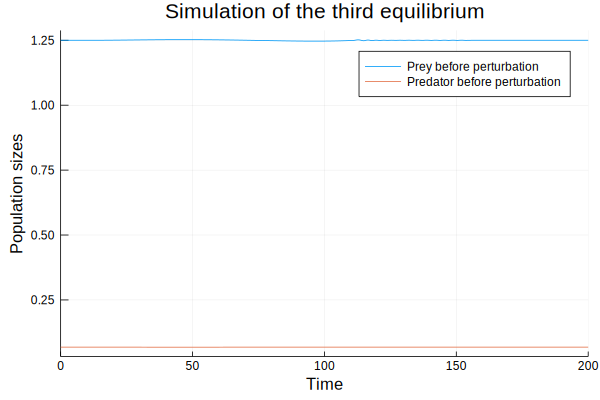

In [38]:
## THIRD EQ

# Parameters
p_eq3 = (r=1.2, α=0.9, β=1.1, γ=0.8, δ=1.0)

# Initial population sizes corresponding to the second equilibrium
u0_eq3 = [p_eq3.δ/p_eq3.γ, (p_eq3.r/p_eq3.β)-((p_eq3.α*p_eq3.δ)/(p_eq3.γ*p_eq3.β))]

# t0 - t end
t_eq3 = (0., 200.)

# Problem definition
prob_eq3 = ODEProblem(predation, u0_eq3, t_eq3, p_eq3)

# Problem resolution
solution_eq3 = solve(prob_eq3)

# Plot the solution before perturbation
plot(solution_eq3, label=["Prey before perturbation" "Predator before perturbation"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the third equilibrium")




In [5]:
"""
This function is generating a multitudes of combinations of parameters and is returning a combination that suits either a stable or an unstable equilibrium for the third equilibrium.

It takes in argument:
stability: either stable or unstable equilibrium

It returns:
A combination of parameters corresponding the the desired situation (stable or unstable)
"""

function parameters_eq3(stability)
    p_eq3_stable = []
    p_eq3_unstable = []
    # Grid for the generation of parameters
    possible_values = 0.9:0.05:1.1
    for r in possible_values, α in possible_values
        for β in possible_values
            for γ in possible_values, δ in possible_values
                p = (r=r, α=α, β=β, γ=γ, δ=δ)
                if p.r/p.α > p.δ/p.γ
                    push!(p_eq3_stable, p)
                end
                if p.r/p.α < p.δ/p.γ
                    push!(p_eq3_unstable, p)
                end
            end
        end
    end
    if stability == "stable"
        return(rand(p_eq3_stable))
    end
    if stability == "unstable"
        return(rand(p_eq3_unstable))
    end
end

parameters_eq3 (generic function with 1 method)

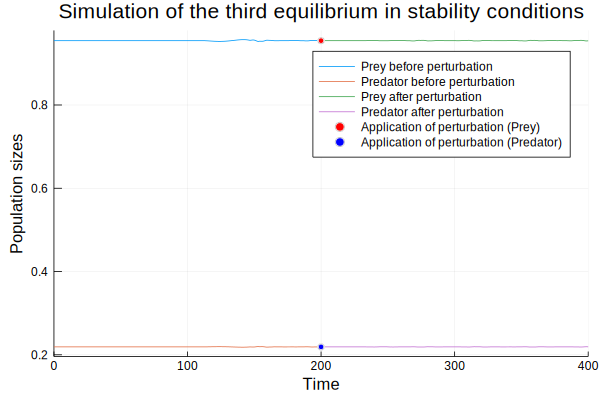

In [9]:
##Third EQ PERTURBATION STABLE

##Simulation for a stable equilibrium before perturbation

# Parameters for a stable equilibrium
p_eq3_stable = parameters_eq3("stable")

# Initial population sizes corresponding to the second equilibrium
u0_eq3_stable = [p_eq3_stable.δ/p_eq3_stable.γ, (p_eq3_stable.r/p_eq3_stable.β)-((p_eq3_stable.α*p_eq3_stable.δ)/(p_eq3_stable.γ*p_eq3_stable.β))]

# t0 - t end
t_eq3_stable = (0., 200.)

# Problem definition
prob_eq3_stable = ODEProblem(predation, u0_eq3_stable, t_eq3_stable, p_eq3_stable)

# Problem resolution
solution_eq3_stable = solve(prob_eq3_stable)

# Plot the solution before perturbation
plot(solution_eq3_stable, label=["Prey before perturbation" "Predator before perturbation"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the third equilibrium in stability conditions")

#Simulation for the stable equilibrium after perturbation
# t0 - t end with perturbation
pert_t_eq3_stable = (200., 400.)

#Adding a small perturbation to the intial population sizes that correspond to the third equilibrium
pert_u0_eq3_stable = u0_eq3_stable .+ rand(2).*1e-5

# Problem definition with perturbation
pert_prob_eq3_stable = ODEProblem(predation, pert_u0_eq3_stable, pert_t_eq3_stable, p_eq3_stable)

# Problem resolution with perturbation
pert_solution_eq3_stable = solve(pert_prob_eq3_stable)

# Plot the solutionafter perturbation
plot!(pert_solution_eq3_stable, xlab="Time", ylab="Population sizes", label=["Prey after perturbation" "Predator after perturbation"], xlim=(0,400))
scatter!([200], [pert_u0_eq3_stable[1]], c=:red, lab="Application of perturbation (Prey)")
scatter!([200], [pert_u0_eq3_stable[2]], c=:blue, lab="Application of perturbation (Predator)", legend =:best)



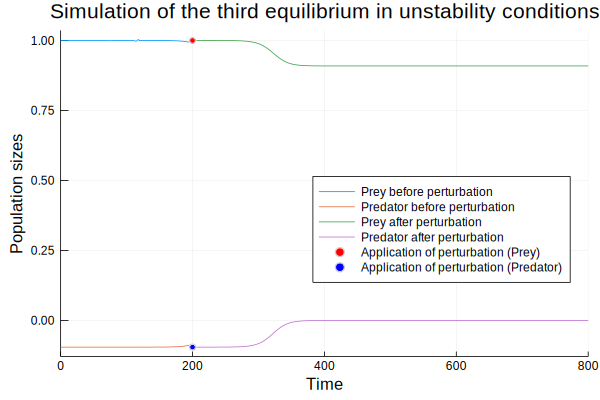

In [11]:
##Third EQ PERTURBATION UNSTABLE

##Simulation for a unstable equilibrium before perturbation

# Parameters for a unstable equilibrium
p_eq3_unstable = parameters_eq3("unstable")

# Initial population sizes corresponding to the third equilibrium
u0_eq3_unstable = [p_eq3_unstable.δ/p_eq3_unstable.γ, (p_eq3_unstable.r/p_eq3_unstable.β)-((p_eq3_unstable.α*p_eq3_unstable.δ)/(p_eq3_unstable.γ*p_eq3_unstable.β))]

# t0 - t end
t_eq3_unstable = (0., 200.)

# Problem definition
prob_eq3_unstable = ODEProblem(predation, u0_eq3_unstable, t_eq3_unstable, p_eq3_unstable)

# Problem resolution
solution_eq3_unstable = solve(prob_eq3_unstable)

# Plot the solution before perturbation
plot(solution_eq3_unstable, label=["Prey before perturbation" "Predator before perturbation"], xlabel ="Time", ylabel="Population sizes", title="Simulation of the third equilibrium in unstability conditions")

#Simulation for the unstable equilibrium after perturbation
# t0 - t end with perturbation
pert_t_eq3_unstable = (200., 800.)

#Adding a small perturbation to the intial population sizes that correspond to the third equilibrium
pert_u0_eq3_unstable = u0_eq3_unstable .+ rand(2).*1e-5

# Problem definition with perturbation
pert_prob_eq3_unstable = ODEProblem(predation, pert_u0_eq3_unstable, pert_t_eq3_unstable, p_eq3_unstable)

# Problem resolution with perturbation
pert_solution_eq3_unstable = solve(pert_prob_eq3_unstable)

# Plot the solutionafter perturbation
plot!(pert_solution_eq3_unstable, xlab="Time", ylab="Population sizes", label=["Prey after perturbation" "Predator after perturbation"], xlim=(0,800))
scatter!([200], [pert_u0_eq3_unstable[1]], c=:red, lab="Application of perturbation (Prey)")
scatter!([200], [pert_u0_eq3_unstable[2]], c=:blue, lab="Application of perturbation (Predator)", legend =:right)



In [130]:
# Plot
plot(solution)
plot(solution, vars=(1,2), xlab="x", ylab="y", aspectratio=1, xlim=(0,1), ylim=(0,1))
scatter!([u0[1]], [u0[2]], c=:black, lab="u0")

function eq_2_sp(p)
    k = p.B*p.b-p.A*p.a
    x̂ = (p.B*p.r - p.R*p.a)/k 
    ŷ = (p.b*p.R - p.r*p.A)/k 
    return (x̂, ŷ)
end

eq_2_sp_exists(p) = all(eq_2_sp(p).>1e-3)

# Grid for the search 
possible_values = 0.9:0.05:1.1

# Empty array for parameter values 
p_eq = []

# Grid search
for a in possible_values, A in possible_values
    for b in possible_values, B in possible_values
        p = (r=1.0, R=1.0, a=a, A=A, b=b, B=B)
        push!(p_eq, p) 
    end
end

# Keep only parameters for which the 2sp equilibrium exists 
filter!(eq_2_sp_exists, p_eq)

# Function for stability
eq_2_sp_is_stable(p) = (p.b/p.A)<(p.r/p.R)<(p.a/p.B)

# Exists, stable
p_stable = filter(eq_2_sp_is_stable, p_eq) 
p_unstable = filter(!eq_2_sp_is_stable, p_eq)

# Simulation of one trajectory (stable)
p_st_1 = rand(p_stable)
prob_st = ODEProblem(competition, [0.01, 0.01], t, p_st_1) 
sol_st = solve(prob_st)
plot(sol_st, vars=(1,2), c=:blue, lab="Stable", lw=2, xlim= (0,1.2), ylim=(0,1.2), xlab="x", ylab="y", frame=:box, aspectratio=1)
scatter!(eq_2_sp(p_st_1), c=:blue, ms=8, lab="", msw=0)

p_un_1 = rand(p_unstable)
prob_un = ODEProblem(competition, [0.01, 0.01], t, p_un_1) 
sol_un = solve(prob_un)

plot!(sol_un, vars=(1,2), c=:red, lab="Unstable", lw=2, xlim= (0,1.2), ylim=(0,1.2), xlab="x", ylab="y", frame=:box, aspectratio=1)
scatter!(eq_2_sp(p_un_1), c=:red, ms=8, lab="", msw=0)

# Simulation of a perturbation from equilibrium
eq_un = eq_2_sp(p_un_1)
eq_un_pert = eq_un .+ rand(2).*1e-5
prob_un_pert = ODEProblem(competition, eq_un_pert, t, p_un_1) 
sol_un_pert = solve(prob_un_pert)
plot!(sol_un_pert, vars=(1,2), c=:red, lab="", lw=1, ls=:dot, xlim=(0,1.2), ylim=(0,1.2))

# Steamplot
pl_st = plot()
for model_run in 1:300
    prob = ODEProblem(competition, rand(2), t, p_st_1)
    sol = solve(prob)
    plot!(pl_st, sol, vars=(1,2), leg=false, c=:teal, alpha=0.2)
end
xaxis!(pl_st, "x", (0,1.2))
yaxis!(pl_st, "y", (0,1.2))
scatter!(pl_st, eq_2_sp(p_st_1), c=:teal, msw=0, ms=8)

# Steamplot / unstable 
pl_un = plot()
for model_run in 1:300
    prob = ODEProblem(competition, rand(2), t, p_un_1) 
    sol = solve(prob)
    plot!(pl_un, sol, vars=(1,2), leg=false, c=:orange,
    alpha=0.2) 
end

xaxis!(pl_un, "x", (0,1.2))
yaxis!(pl_un, "y", (0,1.2))
scatter!(pl_un, eq_2_sp(p_un_1), c=:orange, msw=0, ms=8)
plot(pl_st, pl_un)


UndefVarError: UndefVarError: solution not defined